# Graded Quiz - Python Programming
ANSWER TO ASSESMENT_TAG_ALONG CODE

# STAGE B QUIZ Machine Learning: Regression Predicting Energy Efficiency of Buildings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('energydata_complete .csv')
df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
df.shape

(19735, 29)

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000
T5,19735.0,19.592106,1.844623,15.330000,18.277500,19.390000,20.619643,25.795000


In [89]:
df.corr()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


<AxesSubplot:>

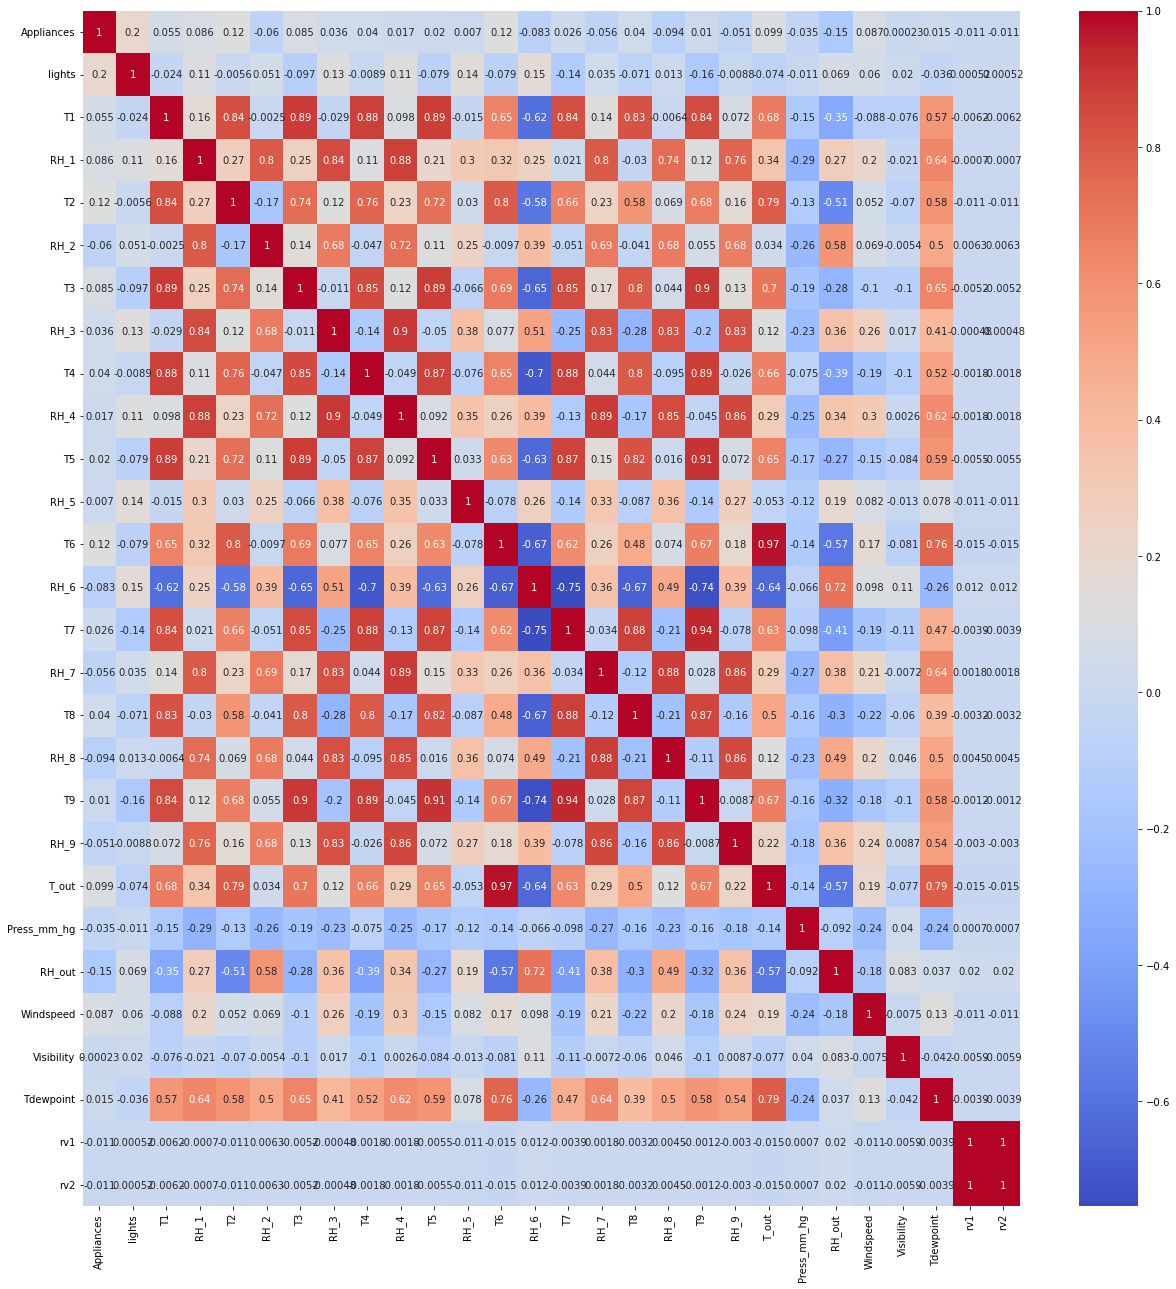

In [10]:
plt.figure(figsize=(21,22))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [11]:
df.drop(['date'], axis=1, inplace=True)

In [12]:
df.drop(['lights'], axis=1, inplace=True)

In [13]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)

In [14]:
features_df = normalized_df.drop(columns='Appliances')
target_df = normalized_df['Appliances']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.3, random_state=42)

In [72]:
df.iloc[:,[3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].head()

,T2,RH_2,T3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out
0,19.2,44.790000,19.79,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0
1,19.2,44.722500,19.79,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0
2,19.2,44.626667,19.79,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0
3,19.2,44.590000,19.79,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0
4,19.2,44.530000,19.79,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0


# Q12-Q20: Answer to the following questions based on the  Appliances Energy Prediction  dataset provided 

# Question 12
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). 
What is the R^2 value in two d.p.?

In [81]:
T2_xtrain = x_train[['T2']]
T6_ytrain = x_train[['T6']]

T2_xtest = x_test[['T2']]
T6_ytest = x_test[['T6']]

In [82]:
model = LinearRegression()

In [83]:
model.fit(T2_xtrain,T6_y_train)
predicted_T6_y = model.predict(T2_xtest)
r2_score = r2_score(T6_ytest, predicted_T6_y)
print(round(r2_score,2))

0.64


# Question 13
Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [20]:
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
MAE = mean_absolute_error(y_test, predicted_y)
print(round(MAE,2))

0.05


# Question 14
What is the Residual Sum of Squares (in two decimal places)?

In [21]:
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
RSS = np.sum(np.square(y_test-predicted_y))
print(round(RSS,2))

45.35


# Question 15
What is the Root Mean Squared Error (in three decimal places)?

In [22]:
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, predicted_y))
print(round(RMSE,3))

0.088


# Question 16
What is the Coefficient of Determination in two decimal places

In [42]:
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)



In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predicted_y)
print(round(r2,2))

0.15


# Question 17
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [46]:
model.fit(x_train, y_train)

def get_feature_weights(model, feature, column_name):
    weights_array = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights_array).reset_index()
    weights_df.columns = ['Features', column_name]
    weights_df[column_name].round(3)
    return weights_df

In [47]:
Linear_model_weights = get_feature_weights(model, x_train, 'Linear_model_weight')
Linear_model_weights

,Features,Linear_model_weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


# Answer: RH_2 and RH_1 respectively

# Question 18
Train a ridge regression model with an alpha value of 0.4. 
Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [48]:
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)
predicted_y = ridge_reg.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, predicted_y))
print(round(RMSE,3))

0.088


# No Change  in the value

# Question 19
Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. 
How many of the features have non-zero feature weights?

In [49]:
lasso_model = Lasso(alpha= 0.001)
lasso_model.fit(x_train, y_train)
def get_feature_weights(model, feature, column_name):
    weights_array = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights_array).reset_index()
    weights_df.columns = ['Features', column_name]
    weights_df[column_name].round(3)
    return weights_df

In [50]:
lasso_model_weights = get_feature_weights(lasso_model, x_train, 'lasso_model_weights')
lasso_model_weights

,Features,lasso_model_weights
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [51]:
lasso_model_weights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Features             26 non-null     object 
 1   lasso_model_weights  26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 544.0+ bytes


# Question 20
What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [53]:
lasso_model = Lasso(alpha= 0.001)
lasso_model.fit(x_train, y_train)
predicted_y = lasso_model.predict(x_test)
RMSE= np.sqrt(mean_squared_error(y_test,predicted_y))
print(round(RMSE,3))

0.094
